----- DATA HEAD -----
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

----- CLUSTERED DATA (HEAD) -----
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4     

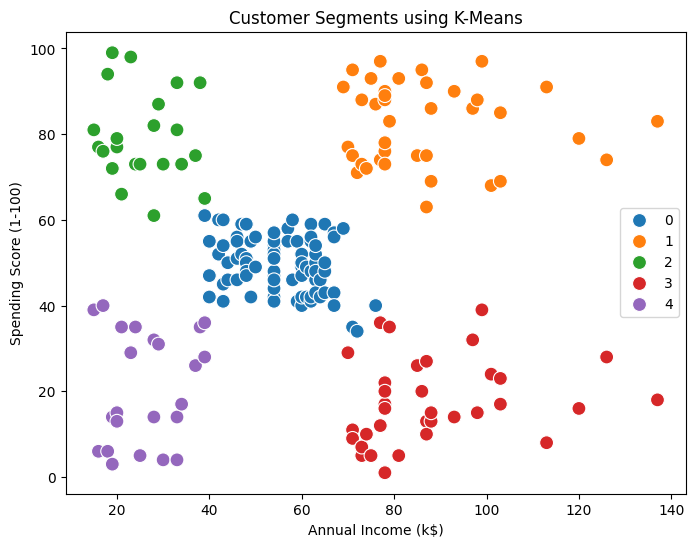

----- CLUSTER SUMMARY -----
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# ------------------------------------------
# Load Dataset
# ------------------------------------------
df = pd.read_csv("/content/Mall_Customers .csv")  # Change if your file has a different name

# Show the first rows of the dataset
print("----- DATA HEAD -----")
print(df.head(), "\n")

# ------------------------------------------
# Select Features for Clustering
# ------------------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ------------------------------------------
# Train K-Means (Choose K)
# ------------------------------------------
k = 5   # You can change this if needed
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# ------------------------------------------
# Show clustered data
# ------------------------------------------
print("----- CLUSTERED DATA (HEAD) -----")
print(df.head(), "\n")

# ------------------------------------------
# Visualize Clusters (no centroids)
# ------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10',
    s=100
)

plt.title("Customer Segments using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# ------------------------------------------
# Optional: Cluster-wise summary
# ------------------------------------------
print("----- CLUSTER SUMMARY -----")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
